Unit 3 / Lesson 2 / Project 6 - Challenge

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class'] 
data = pd.read_csv("iris.data", names=names)

In [3]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
X = data.drop('Class', axis=1)
y = data.Class

## Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X = sc.fit_transform(X)
X = pd.DataFrame(X, columns=names[:-1])

## Decesion Tree

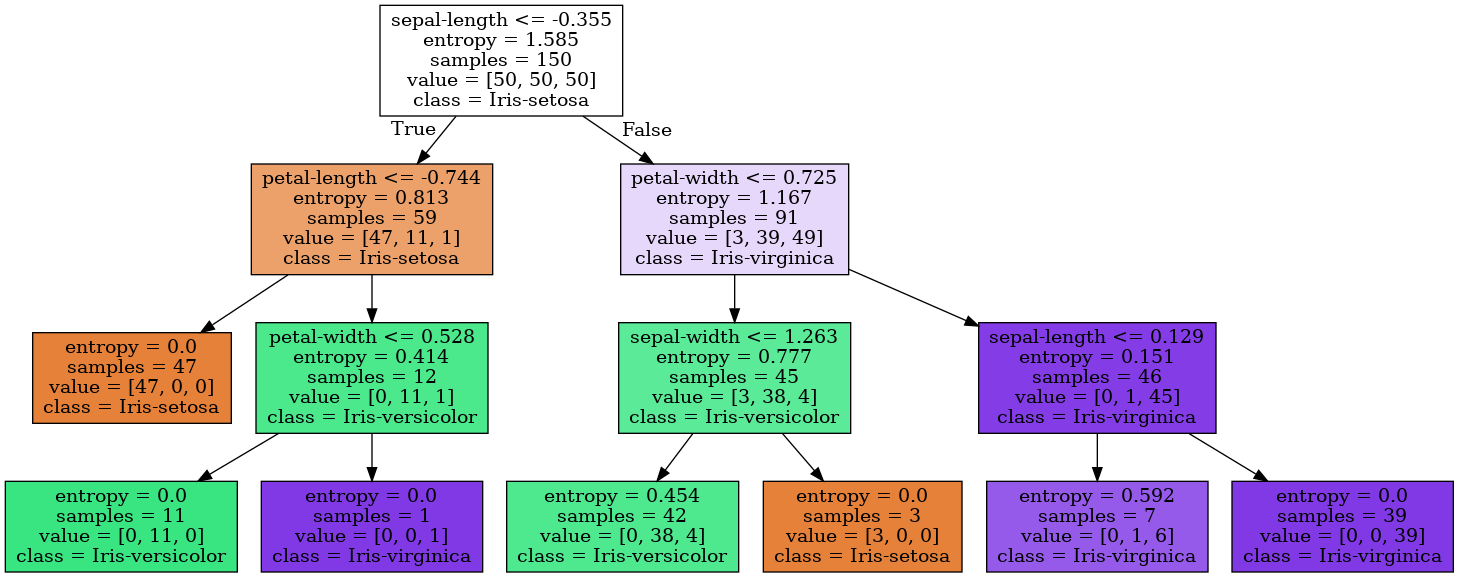

In [7]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=3,
    random_state = 1337
)
decision_tree.fit(X, y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [8]:
from sklearn.model_selection import cross_val_score
tree_score_mean = cross_val_score(decision_tree, X, y, cv=10).mean()
print(tree_score_mean)

0.9466666666666667


## Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3, random_state=0)  
rfc_score_mean = cross_val_score(rfc, X, y, cv=10).mean()
print(rfc_score_mean)

0.9466666666666667


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)  
X_3 = pca.fit_transform(X)

rfc_score_mean = cross_val_score(rfc, X_3, y, cv=10).mean()
print(rfc_score_mean)

0.86


In [11]:
pca = PCA(n_components=2)  
X_2 = pca.fit_transform(X)

rfc_score_mean = cross_val_score(rfc, X_2, y, cv=10).mean()
print(rfc_score_mean)

0.9


In [12]:
pca = PCA(n_components=1)  
X_1 = pca.fit_transform(X)

rfc_score_mean = cross_val_score(rfc, X_1, y, cv=10).mean()
print(rfc_score_mean)

0.9066666666666666


In [13]:
import time
start_time = time.time()
tree_score_mean = cross_val_score(decision_tree, X, y, cv=10).mean()
tree_time = ((time.time() - start_time))

In [14]:
start_time = time.time()
rfc_score_mean = cross_val_score(rfc, X, y, cv=10).mean()
rfc_time = ((time.time() - start_time))

In [15]:
tree_time

0.10426878929138184

In [16]:
rfc_time

0.5909769535064697

In [17]:
(tree_time / rfc_time)*100

17.643461165908285

the decesion tree runs in a fraction of the time it takes to run the random forest classifier